In [1]:
import gzip
import pickle
from MapClass import SemanticMap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from lightglue import viz2d
from keypoint_extractor import KeypointExtractor
import cv2

['floor', 'ceiling', 'wall', 'chair', 'door']
<built-in function listdir>


c:\Users\ofsaa\AppData\Local\Programs\Python\Python310\lib\site-packages\lightglue\lightglue.py:24: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


In [4]:
semantic_map = SemanticMap()
# Print the attributes of the loaded object
print("Attributes of the loaded object:")
attributes = semantic_map.__dict__.keys()
for attr in attributes:
    print(attr)
    # Print the value of the attribute
    print(type(getattr(semantic_map, attr)))


Attributes of the loaded object:
top_down_map
<class 'NoneType'>
free_space_mask
<class 'NoneType'>
poses
<class 'NoneType'>
instance_id_to_name
<class 'dict'>
rgb_observations
<class 'dict'>
semantic_observations
<class 'dict'>
semantic_prediction_masks
<class 'NoneType'>
semantic_prediction_instance_ids
<class 'NoneType'>
keypoints
<class 'NoneType'>
descriptors
<class 'NoneType'>
masks
<class 'dict'>


In [7]:
len(semantic_map.rgb_observations)

0

In [6]:
with gzip.open('semantic_map_00800-TEEsavR23oF.pkl', 'rb') as f:
    semantic_map = pickle.load(f)
print("Attributes of the loaded object:")
attributes = semantic_map.__dict__.keys()
for attr in attributes:
    print(attr)
    # Print the value of the attribute
    print(type(getattr(semantic_map, attr)))

Attributes of the loaded object:
top_down_map
<class 'numpy.ndarray'>
free_space_mask
<class 'numpy.ndarray'>
poses
<class 'list'>
instance_id_to_name
<class 'dict'>
rgb_observations
<class 'dict'>
semantic_observations
<class 'dict'>
semantic_prediction_masks
<class 'dict'>
semantic_prediction_instance_ids
<class 'dict'>
keypoints
<class 'NoneType'>
descriptors
<class 'NoneType'>
masks
<class 'dict'>


In [ ]:
remove_list = ["ceiling", "wall", "floor", "window"]
semantic_map.new_instance_id_to_name = {}
for label, name in semantic_map.instance_id_to_name.items():
  if name not in remove_list:
    semantic_map.new_instance_id_to_name[label] = name
    

print(semantic_map.new_instance_id_to_name)
print(semantic_map.instance_id_to_name))
print(len(semantic_map.instance_id_to_name))
print(len(semantic_map.new_instance_id_to_name))

{0: 'Unknown', 4: 'door', 5: 'handle', 8: 'chandelier', 9: 'wardrobe', 10: 'tv', 11: 'wardrobe', 12: 'cabinet', 13: 'cabinet', 14: 'blanket', 15: 'pad', 16: 'bed', 17: 'pillow', 18: 'pillow', 19: 'nightstand', 20: 'book', 21: 'table lamp', 22: 'nightstand', 23: 'book', 24: 'table lamp', 25: 'plush toy', 26: 'plush toy', 29: 'window frame', 30: 'armchair', 32: 'door', 33: 'door frame', 34: 'door frame', 35: 'door frame', 41: 'mat', 42: 'towel', 43: 'bucket', 44: 'cabinet', 45: 'tap', 46: 'hand soap', 47: 'door', 48: 'door frame', 49: 'door frame', 50: 'door frame', 51: 'toilet', 52: 'toilet brush', 53: 'lamp', 54: 'lamp', 61: 'shower curtain', 62: 'door', 63: 'door frame', 64: 'door frame', 75: 'curtain', 76: 'curtain', 77: 'window frame', 78: 'window frame', 79: 'window frame', 80: 'window frame', 82: 'window frame', 83: 'window frame', 84: 'window frame', 85: 'window frame', 87: 'photo', 88: 'sheet', 89: 'sheet', 90: 'sheet', 91: 'sheet', 93: 'frame', 94: 'frame', 95: 'frame', 96: 'fr

In [16]:
print(f"The number of observations is {len(semantic_map.rgb_observations)}")
print(f"The number of semantic predictions is {len(semantic_map.semantic_predictions)}")
print(f"The number of semantic gt is {len(semantic_map.semantic_observations)}")

The number of observations is 144


AttributeError: 'SemanticMap' object has no attribute 'semantic_predictions'

Shape of top_down map: (1112, 1657)


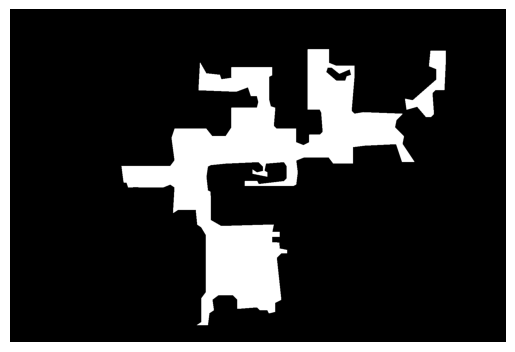

In [17]:
print(f"Shape of top_down map: {semantic_map.free_space_mask.shape}")
plt.imshow(semantic_map.free_space_mask, cmap='gray')
plt.axis('off')
poses = semantic_map.poses.copy()
poses = poses[106:142]
for pose in poses:
    plt.plot(pose[1], pose[0], 'ro')

plt.show()

In [18]:
pose_idx = 0
rgb_img = semantic_map.get_rgb_observation(pose_idx).copy()

print(f"RGB image type : {type(rgb_img)}")
print(f"RGB image shape: {rgb_img.shape}")

sem_img = semantic_map.get_semantic_observation(pose_idx).copy()
print(f"Semantic image type : {type(sem_img)}")
print(f"Semantic image shape: {sem_img.shape}")


RGB image type : <class 'numpy.ndarray'>
RGB image shape: (256, 512, 3)
Semantic image type : <class 'numpy.ndarray'>
Semantic image shape: (256, 512)


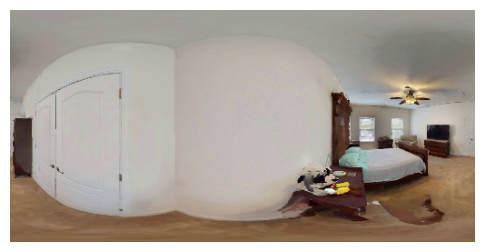

In [19]:
semantic_map.display_rgb_observation(pose_idx)

In [20]:
instance_id_to_name = semantic_map.instance_id_to_name.copy()
print(f"Type of instance_id_to_name: {type(instance_id_to_name)}")
print(f"Number of instances: {len(instance_id_to_name)}")
print(f"Instance ID to name mapping: {instance_id_to_name}")

Type of instance_id_to_name: <class 'dict'>
Number of instances: 661
Instance ID to name mapping: {0: 'Unknown', 1: 'ceiling', 2: 'wall', 3: 'wall', 4: 'door', 5: 'handle', 6: 'wall', 7: 'wall', 8: 'chandelier', 9: 'wardrobe', 10: 'tv', 11: 'wardrobe', 12: 'cabinet', 13: 'cabinet', 14: 'blanket', 15: 'pad', 16: 'bed', 17: 'pillow', 18: 'pillow', 19: 'nightstand', 20: 'book', 21: 'table lamp', 22: 'nightstand', 23: 'book', 24: 'table lamp', 25: 'plush toy', 26: 'plush toy', 27: 'window', 28: 'window', 29: 'window frame', 30: 'armchair', 31: 'floor', 32: 'door', 33: 'door frame', 34: 'door frame', 35: 'door frame', 36: 'wall', 37: 'wall', 38: 'wall', 39: 'wall', 40: 'floor', 41: 'mat', 42: 'towel', 43: 'bucket', 44: 'cabinet', 45: 'tap', 46: 'hand soap', 47: 'door', 48: 'door frame', 49: 'door frame', 50: 'door frame', 51: 'toilet', 52: 'toilet brush', 53: 'lamp', 54: 'lamp', 55: 'ceiling', 56: 'wall', 57: 'wall', 58: 'wall', 59: 'wall', 60: 'wall', 61: 'shower curtain', 62: 'door', 63: 

In [24]:
# find the keys in the dictionary that holds the value 'bed'
keys = [k for k, v in instance_id_to_name.items() if v == 'door']
print(f"Keys for 'door': {keys}")

Keys for 'door': [4, 32, 47, 62, 104, 107, 235, 365, 367, 391, 404, 410, 427, 533, 554, 583, 634, 646]


(-0.5, 511.5, 255.5, -0.5)

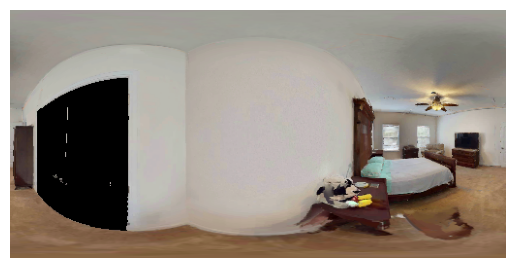

In [25]:
bed_pixels = np.where(sem_img == keys[0])
# paint the bed pixels in black in the RGB image
rgb_img[bed_pixels] = [0, 0, 0]
# plot the image
plt.imshow(rgb_img)
plt.axis('off')

In [43]:
with open("semantic_map_00800-TEEsavR23oF.pkl", "rb") as f:
    semantic_map = pickle.load(f)
prediction_masks = semantic_map.semantic_prediction_masks.copy()
print(f"The type of predictions is {type(prediction_masks)}")

BadGzipFile: Not a gzipped file (b'\x80\x04')

In [54]:
pose_idx = 120

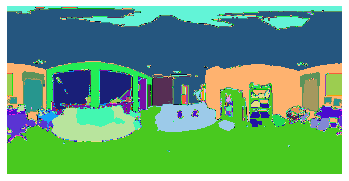

In [56]:
semantic_map.display_semantic_observation(120)

In [57]:
first_prediction_mask = prediction_masks[pose_idx]
print(f"The type of the variable is {type(first_prediction_mask)}")
print(f"The shape of the variable is {first_prediction_mask.shape}")

The type of the variable is <class 'torch.Tensor'>
The shape of the variable is torch.Size([256, 512])


In [ ]:
segment_info = semantic_map.semantic_prediction_instance_ids
print(f"The type of the variable is {type(segment_info)}")
print(f"The shape of the variable is {segment_info.shape}")
first_segmentation_info = segment_info[pose_idx]
print(f"The type of the variable is {type(first_segmentation_info)}")
print(f"The first segmentation info is {first_segmentation_info}")
print(f"The first segmentation label is {first_segmentation_info[0]}")
print(f"The first segmentation object prediction is {first_segmentation_info[-1]}")

SEGMENTS INFOYU AÇIKLA

In [58]:
sem_pred_mask = first_prediction_mask.numpy()
print(f"The tensor is converted to {type(sem_pred_mask)}")
min_val, max_val = np.min(sem_pred_mask), np.max(sem_pred_mask)
print(f"Min value: {min_val}, Max value: {max_val}")

The tensor is converted to <class 'numpy.ndarray'>
Min value: 0, Max value: 17


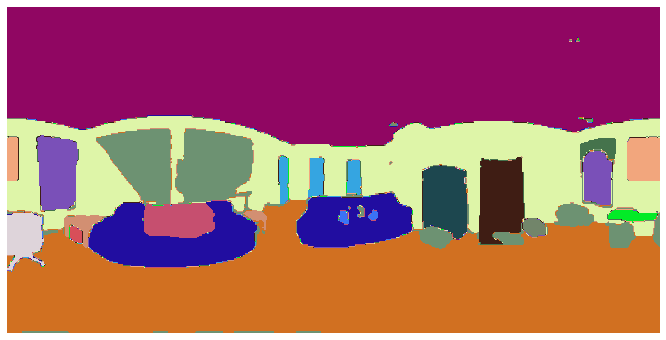

In [64]:
cmap = ListedColormap(np.random.rand(max_val+1, 3))
plt.figure(figsize=(12, 6))
plt.imshow(sem_pred_mask, cmap=cmap)
plt.axis('off')
# plt.show()
plt.savefig('semantic_pred.png')

### BURADA BIR DUR

In [40]:
with open("step3.pkl", "rb") as f:
    semantic_map = pickle.load(f)


TypeError: object of type 'NoneType' has no len()

In [43]:
keypoints = semantic_map.keypoints
descriptors = semantic_map.descriptors

keypoints_at_pose = keypoints[120]
print(f"The type of keypoints is {type(keypoints_at_pose)}")
print(f"The shape of keypoints is {keypoints_at_pose.shape}")


The type of keypoints is <class 'numpy.ndarray'>
The shape of keypoints is (1024, 2)


In [ ]:
print(f"Descriptors shape: {descriptors[pose_idx].shape}")

The type of descriptors is <class 'dict'>


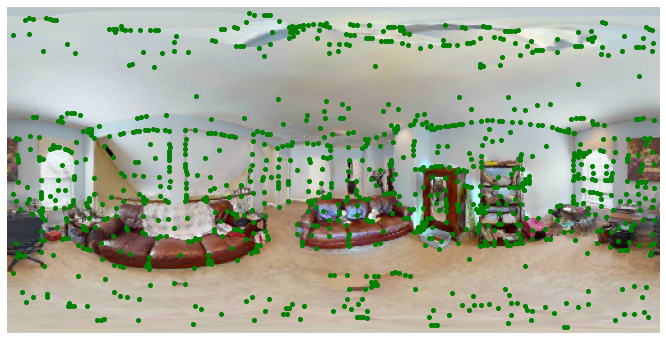

In [51]:
# show the keypoints on the RGB image
rgb_img = semantic_map.get_rgb_observation(120)
plt.figure(figsize=(12,6))
plt.imshow(rgb_img)
plt.axis('off')
for keypoint in keypoints_at_pose:
    plt.plot(keypoint[0], keypoint[1], 'go', markersize=4)
# plt.show()
plt.savefig('keypoints.png')
print(f"The type of descriptors is {type(descriptors)}")

In [ ]:
extractor = KeypointExtractor()
matches = extractor.match_keypoints(semantic_map.keypoint_full_outputs,0,5)
print(matches.keys())


In [ ]:
print(type(matches["matches"][0]))
matches["matches"][0]

In [36]:
keypoints1 = semantic_map.keypoints[0]
keypoints2 = semantic_map.keypoints[5]

mkpts1 = keypoints1[matches["matches"][0][:2, 0]]
mkpts2 = keypoints2[matches["matches"][0][:2, 1]]


TypeError: 'NoneType' object is not subscriptable

In [ ]:
axes = viz2d.plot_images([semantic_map.get_rgb_observation(0), semantic_map.get_rgb_observation(5)])
viz2d.plot_matches(mkpts1, mkpts2, color="lime", lw=0.5)

In [ ]:
import pickle
from MapClass import SemanticMap
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

with open('step3.pkl', 'rb') as f:
    semantic_map = pickle.load(f)

In [2]:
semantic_map.refine_semantic_predictions()

AttributeError: 'SemanticMap' object has no attribute 'semantic_prediction_masks'

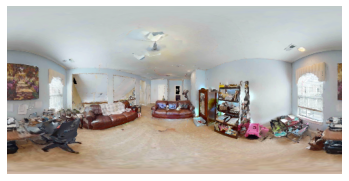

In [78]:
semantic_map.display_rgb_observation(140)

In [79]:
image = semantic_map.rgb_observations[140].copy()

image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
cv2.imwrite('obs4.png', image)
# num_classes = len(np.unique(image))
# cmap = ListedColormap(np.random.rand(num_classes, 3))
# plt.figure(figsize=(12, 6))
# plt.imshow(image, cmap=cmap)
# plt.axis('off')
# plt.savefig('semantic.png')

True

In [19]:
keypoints = semantic_map.keypoints[0].copy()
keypoints2 = np.round(keypoints).astype(int)
print(keypoints[:10])
print(keypoints2[:10])

[[263.25   4.75]
 [265.75   4.75]
 [314.75   5.75]
 [324.75   6.25]
 [298.75   7.75]
 [309.25   7.75]
 [126.75   9.75]
 [  7.25  11.25]
 [ 12.25  11.75]
 [ 79.25  11.75]]
[[263   5]
 [266   5]
 [315   6]
 [325   6]
 [299   8]
 [309   8]
 [127  10]
 [  7  11]
 [ 12  12]
 [ 79  12]]


In [39]:
with open('step3.pkl', 'rb') as f:
    semantic_map = pickle.load(f)


In [59]:
semantic_map.refine_semantic_predictions()

{0: {0: array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  1: array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  2: array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  3: array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  4: array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 

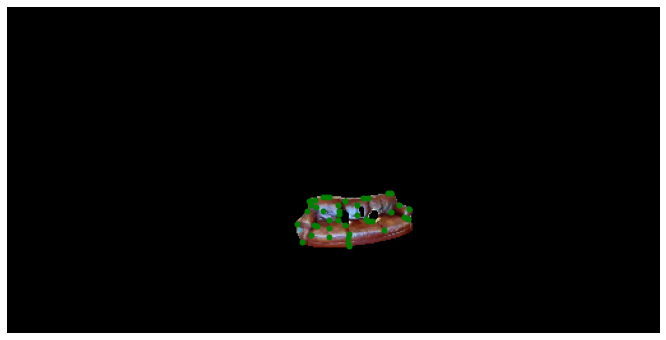

In [65]:
mask = semantic_map.refined_prediction_masks[120][11]
mask_3ch = np.stack([mask] * 3, axis=-1)
rgb_img = semantic_map.get_rgb_observation(120)
masked_img = np.where(mask_3ch, rgb_img, 0) 

plt.figure(figsize=(12,6))
plt.imshow(masked_img)
for kp in keypoints[valid]:
    plt.plot(kp[0], kp[1], 'go', markersize=5)
plt.axis('off')
plt.savefig('object.png')

In [ ]:
keypoints = semantic_map.get_valid_keypoints(120,11)


In [61]:
keypoints = semantic_map.keypoints[120].copy()
keypoints = np.round(keypoints).astype(int)
mask = semantic_map.refined_prediction_masks[120][11]
valid = mask[keypoints[:, 1], keypoints[:, 0]] == 1 
len(keypoints[valid])


43

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [2]:
with open('step4.pkl', 'rb') as f:
    semantic_map = pickle.load(f)


In [7]:
print(len(semantic_map.instance_id_to_name))
semantic_map.refine_semantic_labels()
len(semantic_map.refined_instance_id_to_name)

661


533

In [8]:
semantic_map.refined_instance_id_to_name

{0: 'Unknown',
 4: 'door',
 5: 'handle',
 8: 'chandelier',
 9: 'wardrobe',
 10: 'tv',
 11: 'wardrobe',
 12: 'cabinet',
 13: 'cabinet',
 14: 'blanket',
 15: 'pad',
 16: 'bed',
 17: 'pillow',
 18: 'pillow',
 19: 'nightstand',
 20: 'book',
 21: 'table lamp',
 22: 'nightstand',
 23: 'book',
 24: 'table lamp',
 25: 'plush toy',
 26: 'plush toy',
 29: 'window frame',
 30: 'armchair',
 32: 'door',
 33: 'door frame',
 34: 'door frame',
 35: 'door frame',
 41: 'mat',
 42: 'towel',
 43: 'bucket',
 44: 'cabinet',
 45: 'tap',
 46: 'hand soap',
 47: 'door',
 48: 'door frame',
 49: 'door frame',
 50: 'door frame',
 51: 'toilet',
 52: 'toilet brush',
 53: 'lamp',
 54: 'lamp',
 61: 'shower curtain',
 62: 'door',
 63: 'door frame',
 64: 'door frame',
 75: 'curtain',
 76: 'curtain',
 77: 'window frame',
 78: 'window frame',
 79: 'window frame',
 80: 'window frame',
 82: 'window frame',
 83: 'window frame',
 84: 'window frame',
 85: 'window frame',
 87: 'photo',
 88: 'sheet',
 89: 'sheet',
 90: 'sheet',


In [ ]:
import os
folder_path = '..\gt_objects'
label_of_predictions = semantic_map.group_by_matched_label()
for gt_label, id_list in label_of_predictions.items():
    if gt_label not in semantic_map.refined_instance_id_to_name.keys():
        continue
    output_folder = os.path.join(folder_path,f'{gt_label}_{semantic_map.refined_instance_id_to_name[gt_label]}'))
    for (img_id, mask_id) in id_list:
        if not os.path.exists(output_folder):
            os.mkdir(output_folder)
        rgb_img = semantic_map.rgb_observations[img_id].copy()
        mask = semantic_map.refined_prediction_masks[img_id][mask_id]
        kernel = np.ones((3, 3), np.uint8)
        dilated_mask = cv2.dilate(mask,kernel,iterations=1)
        edges = dilated_mask - mask
        rgb_img[edges==1] = [255,0,0]
        res = cv2.cvtColor(rgb_img,cv2.COLOR_RGB2BGR)
        output_path = str(os.path.join(output_folder,f"{img_id}_{mask_id}.png"))
        cv2.imwrite(output_path,res)



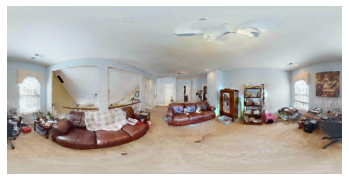

In [ ]:
semantic_map.display_rgb_observation(86)

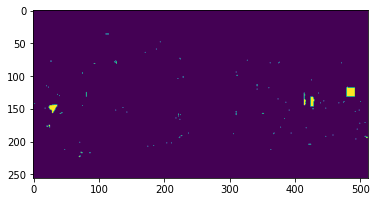

In [6]:
mask = semantic_map.semantic_observations[86].copy()
mask = mask==0
plt.imshow(mask)
plt.show()